Feature Importance Analysis with XGB, SHAP, RFE : Divorce Prediction & Reasons

https://medium.com/@azmine_wasi/divorce-prediction-reasons-feature-importance-analysis-with-xgb-shap-rfe-ba630cb24199

In [1]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

In [2]:
from sklearn import manifold
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("../Data/divorce.csv")
df.head()

Sorry_end  Ignore_diff  begin_correct  Contact  Special_time  No_home_time  \
0          2            2              4        1             0             0   
1          4            4              4        4             4             0   
2          2            2              2        2             1             3   
3          3            2              3        2             3             3   
4          2            2              1        1             1             1   

   2_strangers  enjoy_holiday  enjoy_travel  common_goals  ...  \
0            0              0             0             0  ...   
1            0              4             4             4  ...   
2            2              1             1             2  ...   
3            3              3             3             3  ...   
4            0              0             0             0  ...   

   silence_for_harm  silence_fear_anger  I'm_right  accusations  \
0                 2                   1          3            3   
1                 2                   2          3            4   
2                 3                   2          3            1   
3                 2                   2          3            3   
4                 2                   1          2            3   

   I'm_not_guilty  I'm_not_wrong  no_hesitancy_inadequate  you're_inadequate  \
0               3              2                        3                  2   
1               4              4                        4                  2   
2               1              1                        2                  2   
3               3              3                        2                  2   
4               2              2                        2                  1   

   incompetence  Divorce_Y_N  
0             1            1  
1             2            1  
2             2            1  
3             2            1  
4             0            1  

[5 rows x 55 columns]

In [4]:
df.shape

(170, 55)

In [5]:
df.describe()

Sorry_end  Ignore_diff  begin_correct     Contact  Special_time  \
count  170.000000   170.000000     170.000000  170.000000    170.000000   
mean     1.776471     1.652941       1.764706    1.482353      1.541176   
std      1.627257     1.468654       1.415444    1.504327      1.632169   
min      0.000000     0.000000       0.000000    0.000000      0.000000   
25%      0.000000     0.000000       0.000000    0.000000      0.000000   
50%      2.000000     2.000000       2.000000    1.000000      1.000000   
75%      3.000000     3.000000       3.000000    3.000000      3.000000   
max      4.000000     4.000000       4.000000    4.000000      4.000000   

       No_home_time  2_strangers  enjoy_holiday  enjoy_travel  common_goals  \
count    170.000000   170.000000     170.000000    170.000000    170.000000   
mean       0.747059     0.494118       1.452941      1.458824      1.576471   
std        0.904046     0.898698       1.546371      1.557976      1.421529   
min        0.000000     0.000000       0.000000      0.000000      0.000000   
25%        0.000000     0.000000       0.000000      0.000000      0.000000   
50%        0.000000     0.000000       1.000000      1.000000      2.000000   
75%        1.000000     1.000000       3.000000      3.000000      3.000000   
max        4.000000     4.000000       4.000000      4.000000      4.000000   

       ...  silence_for_harm  silence_fear_anger   I'm_right  accusations  \
count  ...        170.000000          170.000000  170.000000   170.000000   
mean   ...          2.552941            2.270588    2.741176     2.382353   
std    ...          1.371786            1.586841    1.137348     1.511587   
min    ...          0.000000            0.000000    0.000000     0.000000   
25%    ...          2.000000            1.000000    2.000000     1.000000   
50%    ...          3.000000            2.000000    3.000000     3.000000   
75%    ...          4.000000            4.000000    4.000000     4.000000   
max    ...          4.000000            4.000000    4.000000     4.000000   

       I'm_not_guilty  I'm_not_wrong  no_hesitancy_inadequate  \
count      170.000000     170.000000               170.000000   
mean         2.429412       2.476471                 2.517647   
std          1.405090       1.260238                 1.476537   
min          0.000000       0.000000                 0.000000   
25%          1.000000       2.000000                 1.000000   
50%          2.000000       3.000000                 3.000000   
75%          4.000000       4.000000                 4.000000   
max          4.000000       4.000000                 4.000000   

       you're_inadequate  incompetence  Divorce_Y_N  
count         170.000000    170.000000   170.000000  
mean            2.241176      2.011765     0.494118  
std             1.505634      1.667611     0.501442  
min             0.000000      0.000000     0.000000  
25%             1.000000      0.000000     0.000000  
50%             2.000000      2.000000     0.000000  
75%             4.000000      4.000000     1.000000  
max             4.000000      4.000000     1.000000  

[8 rows x 55 columns]

In [6]:
# sns.set(rc={'figure.figsize':(20,50)})
# for i, column in enumerate(df.columns, 1):
#     plt.subplot(11,5,i)
#     sns.histplot(df[column], color='lightgreen',
#                      kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))# Plot the PDF.
#     data = df[column]
#     mu, std = stats.norm.fit(data)
    
#     xmin, xmax = plt.xlim()
#     x = np.linspace(xmin, xmax, 100)
#     p = stats.gamma(df[column])
#     plt.plot(x, p, 'k', linewidth=2)
#     plt.show()


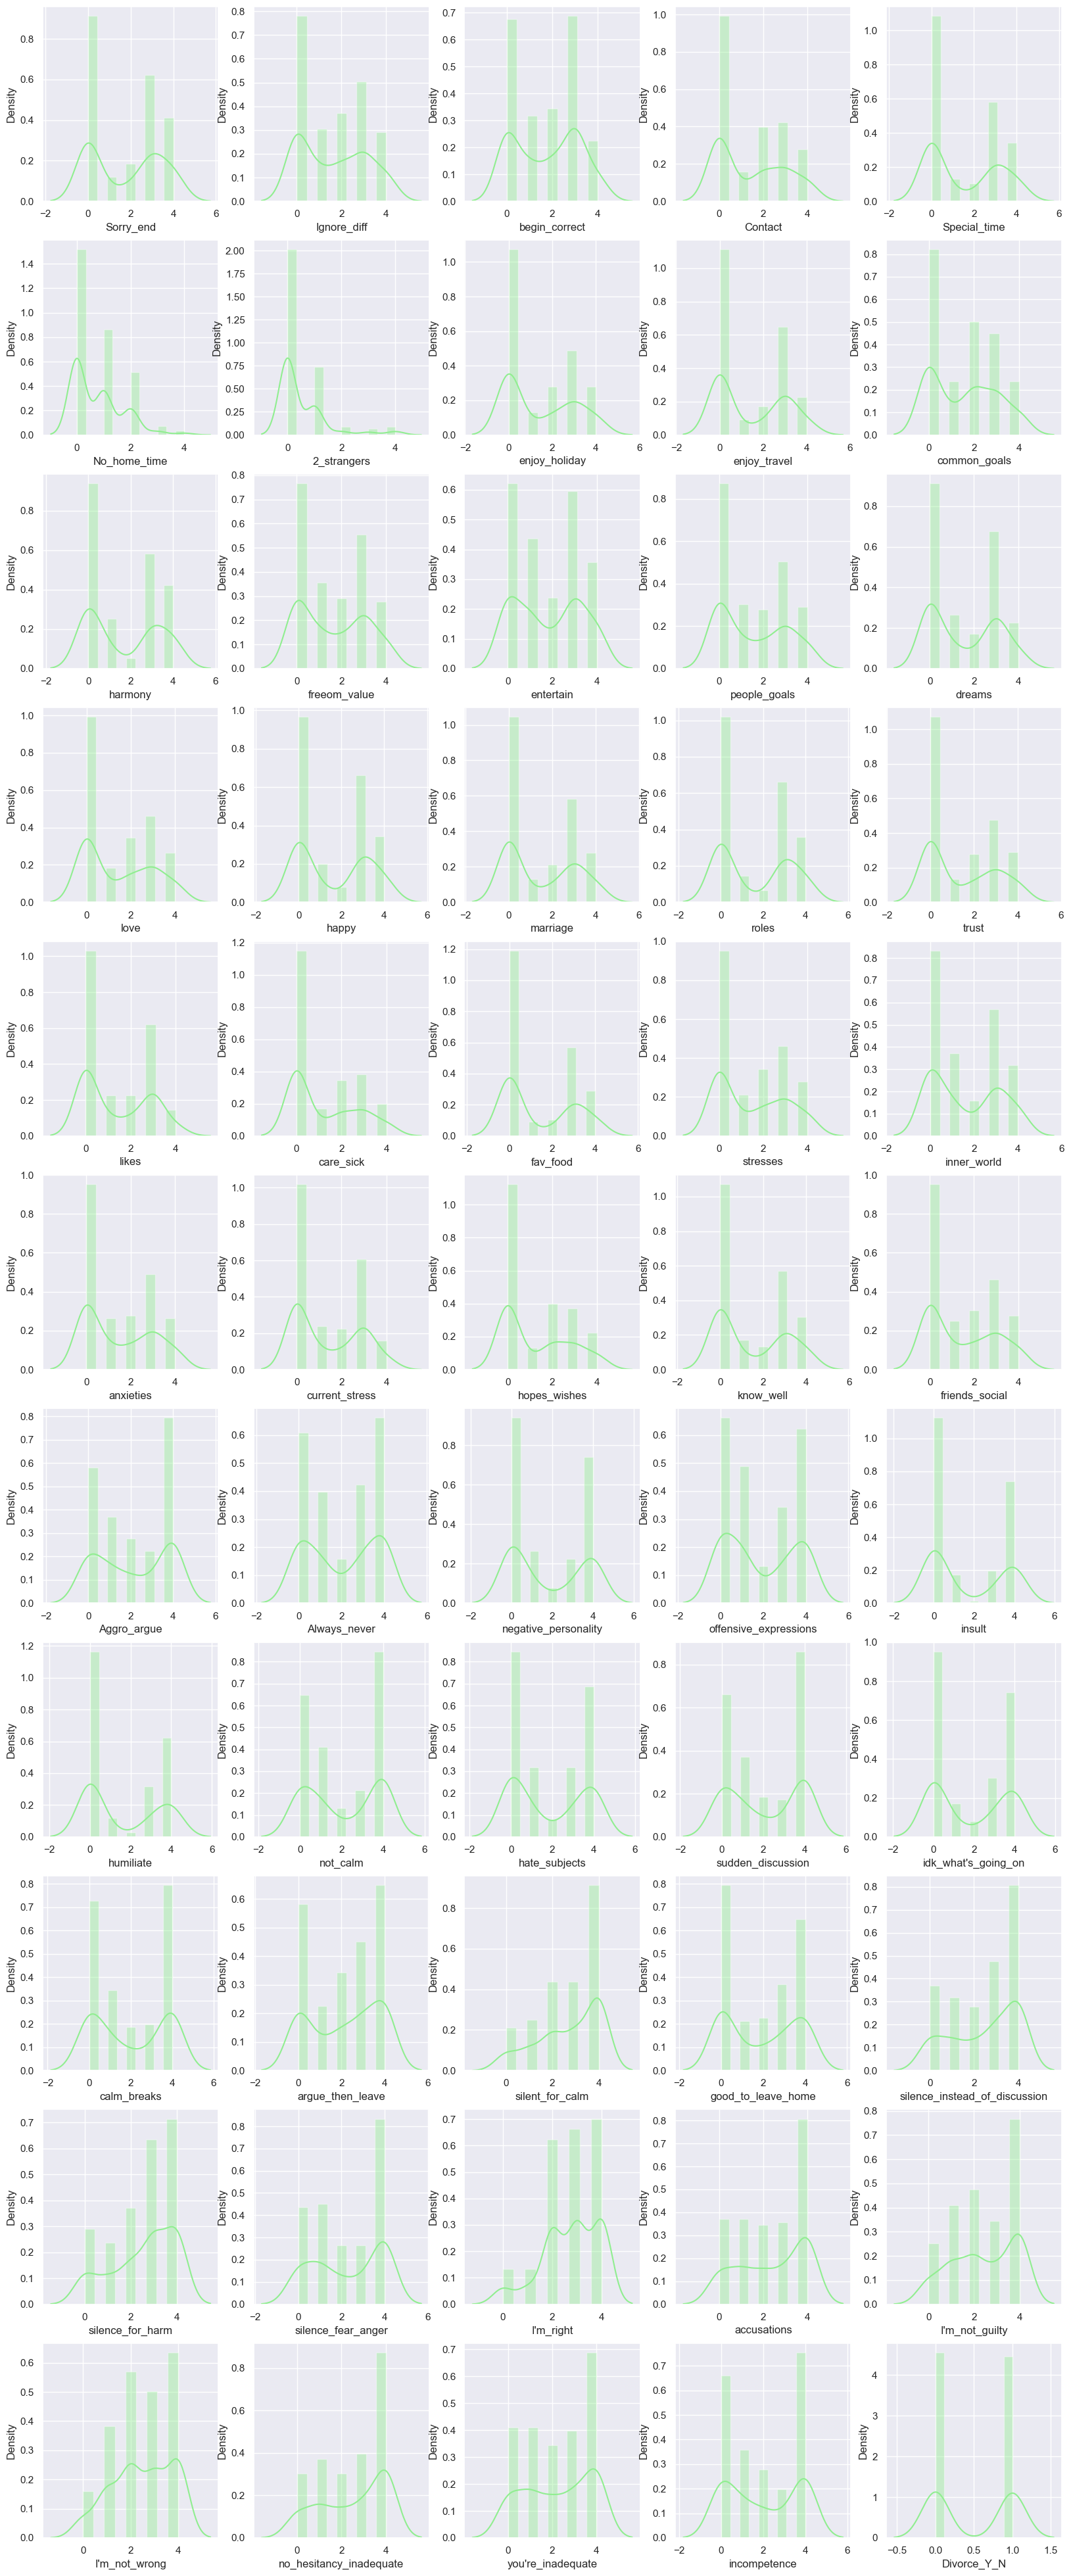

In [7]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(df.columns, 1):
    plt.subplot(11,5,i)
    sns.histplot(df[column], color='lightgreen',
                     kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")
/var/folders/64/8lb4vr6j71gg6bd6mcnjsrb40000gn/T/ipykernel_42770/140120769.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

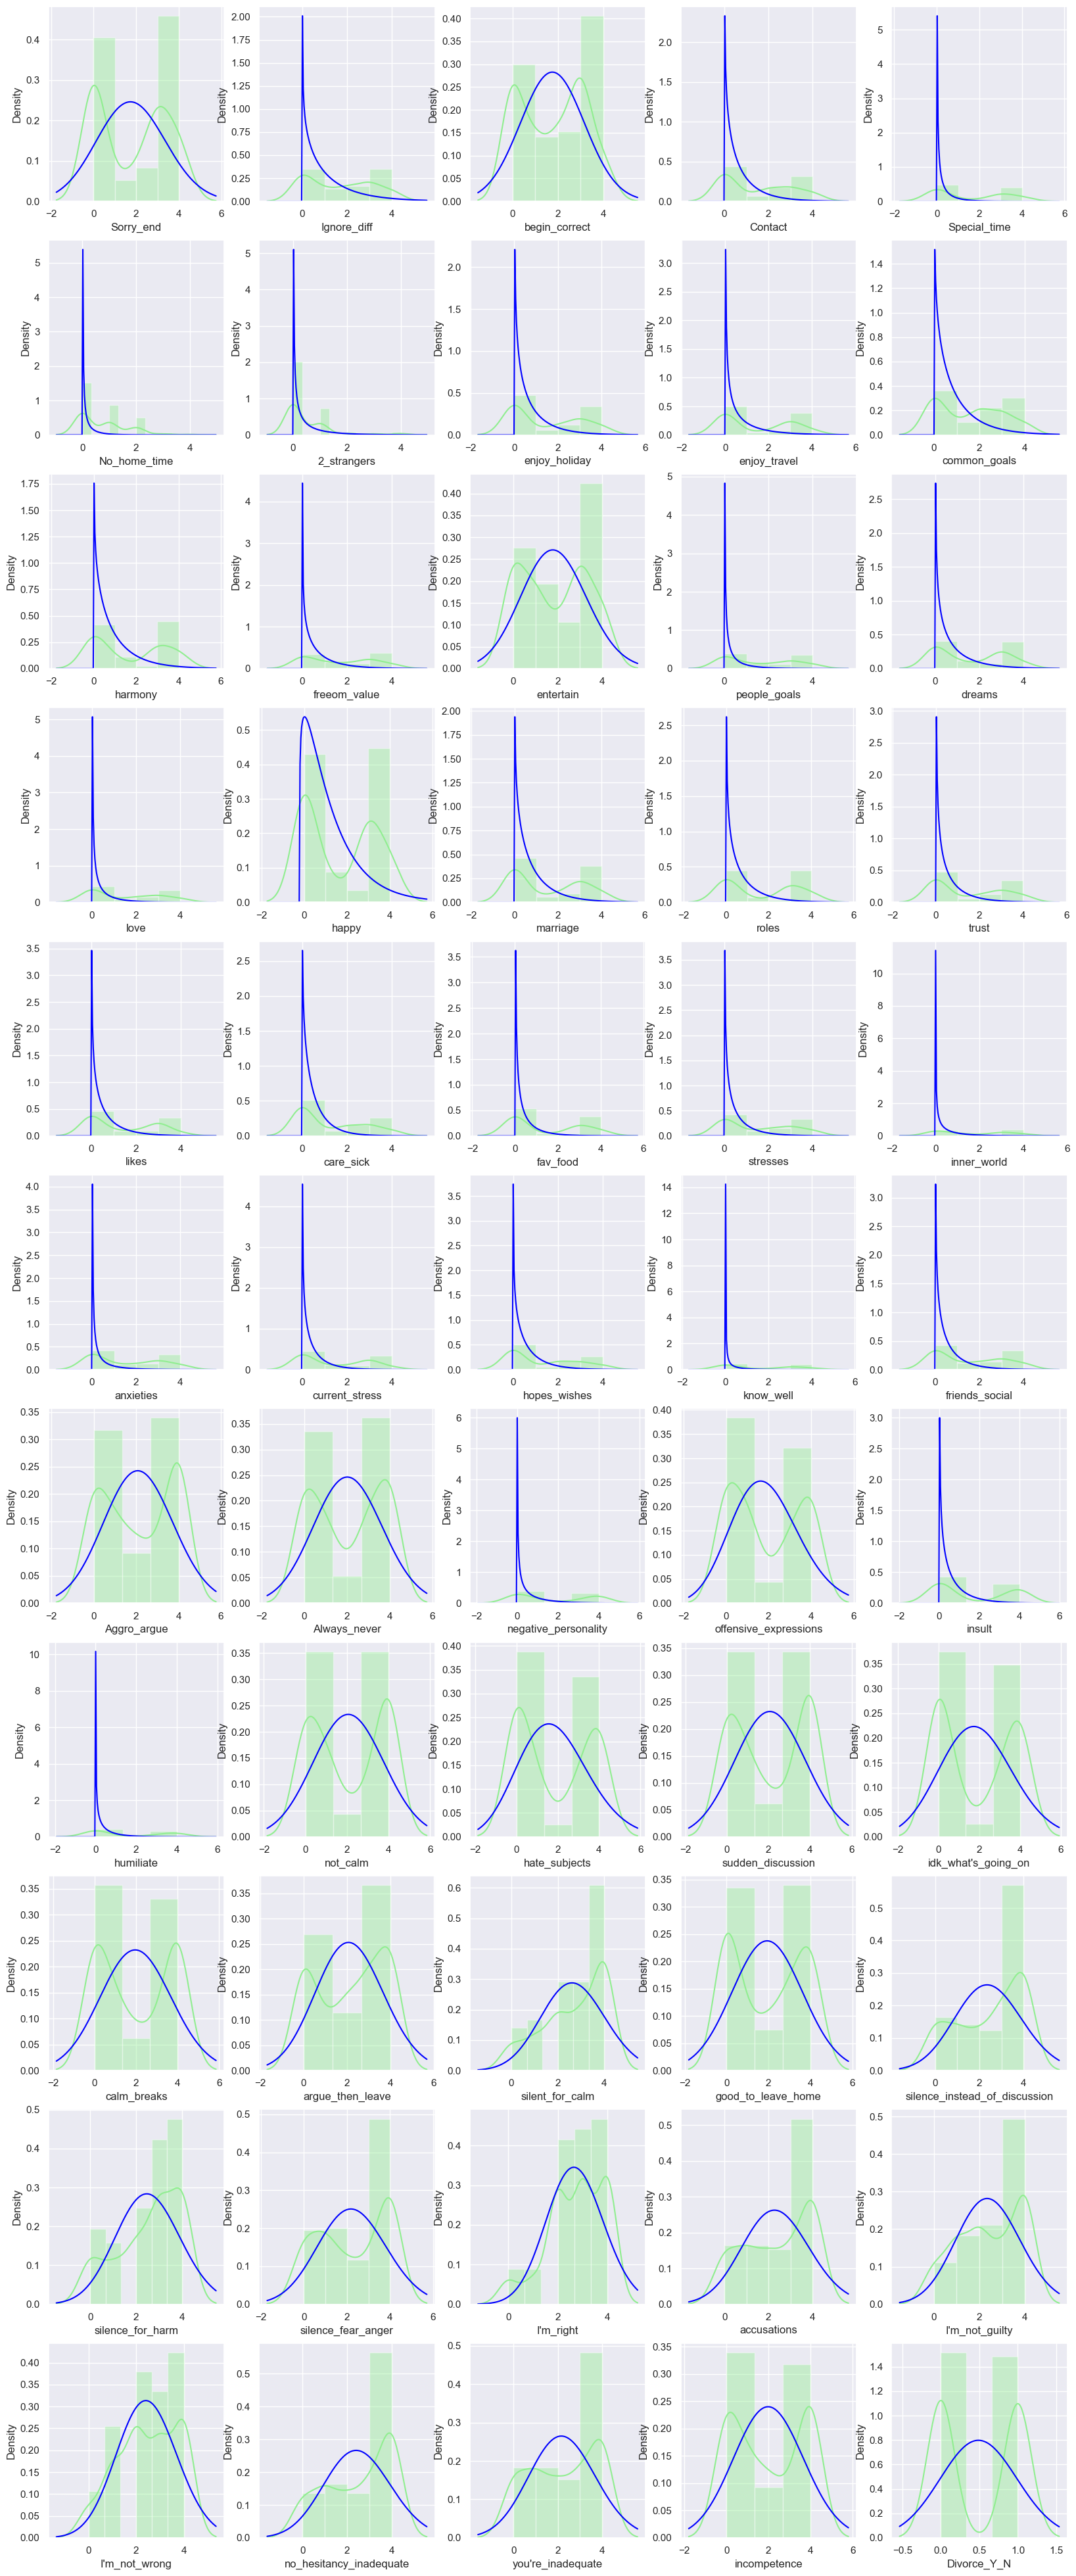

In [8]:
sns.set(rc={'figure.figsize':(20,50)})
for i, column in enumerate(df.columns, 1):
    plt.subplot(11,5,i)
    sns.distplot(df[column],color='lightgreen',fit_kws={"color":"blue"},fit=stats.gamma, label="label 1")

In [9]:
sns.set_theme(rc={'figure.figsize':(20,10)})

In [10]:
FEATURES_TO_DISPLAY_HEAT_MAP = 11

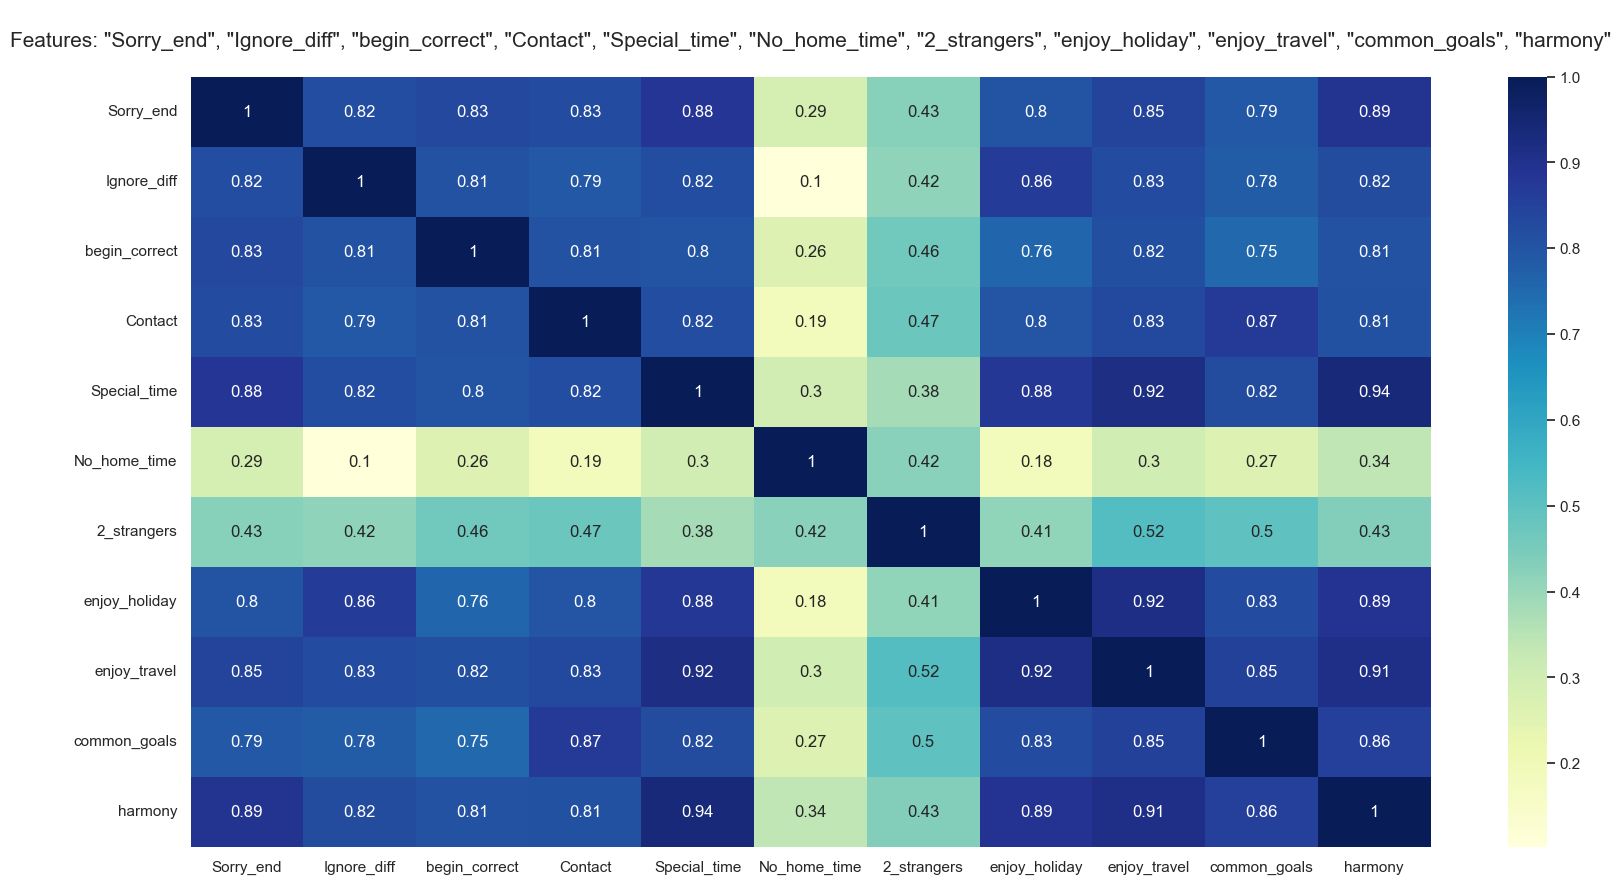

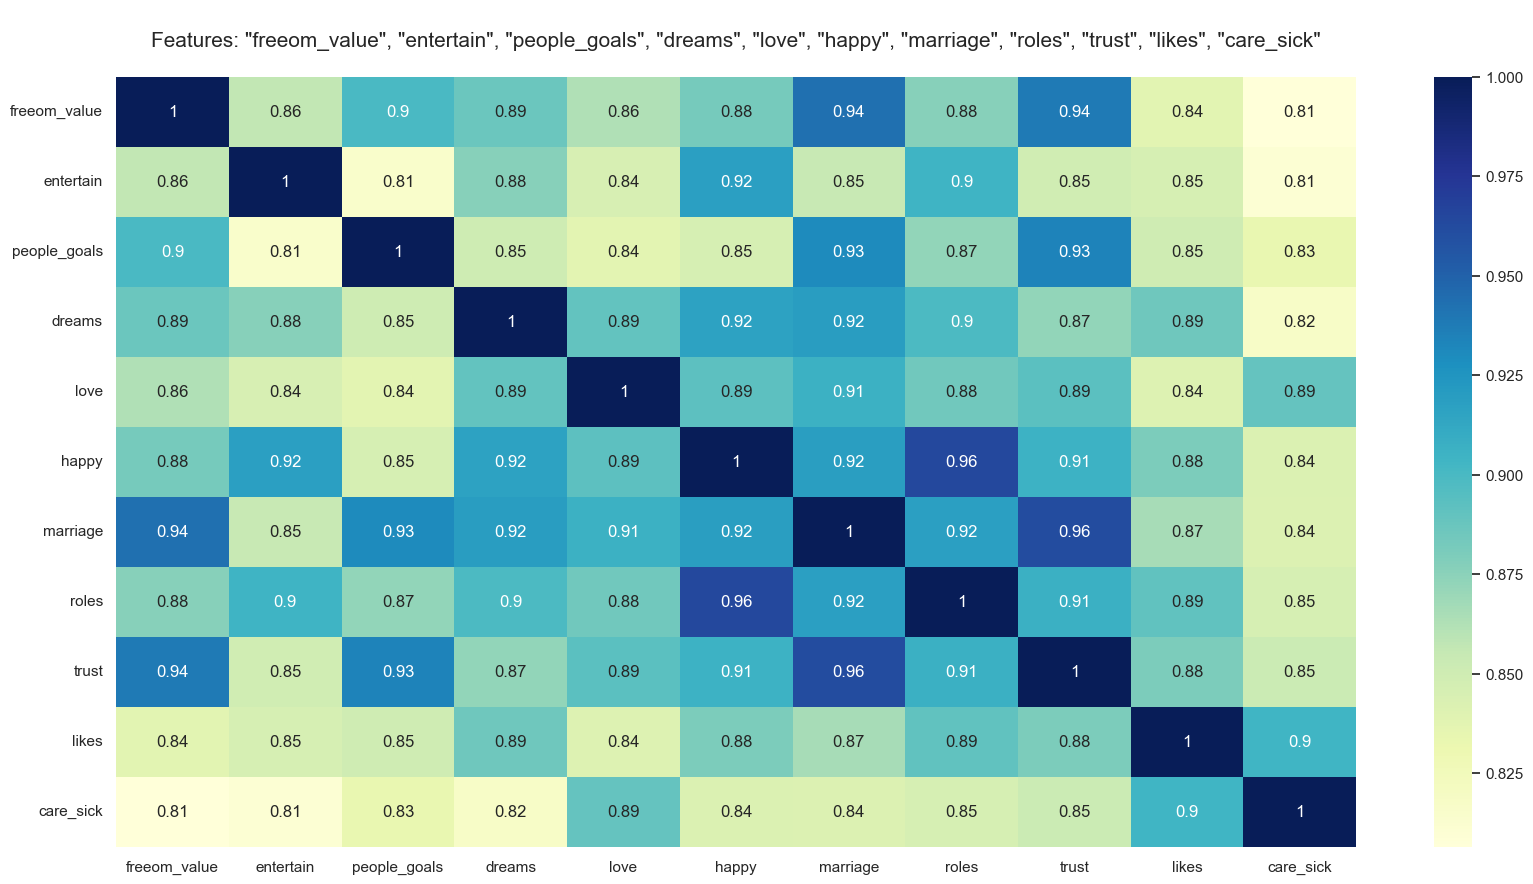

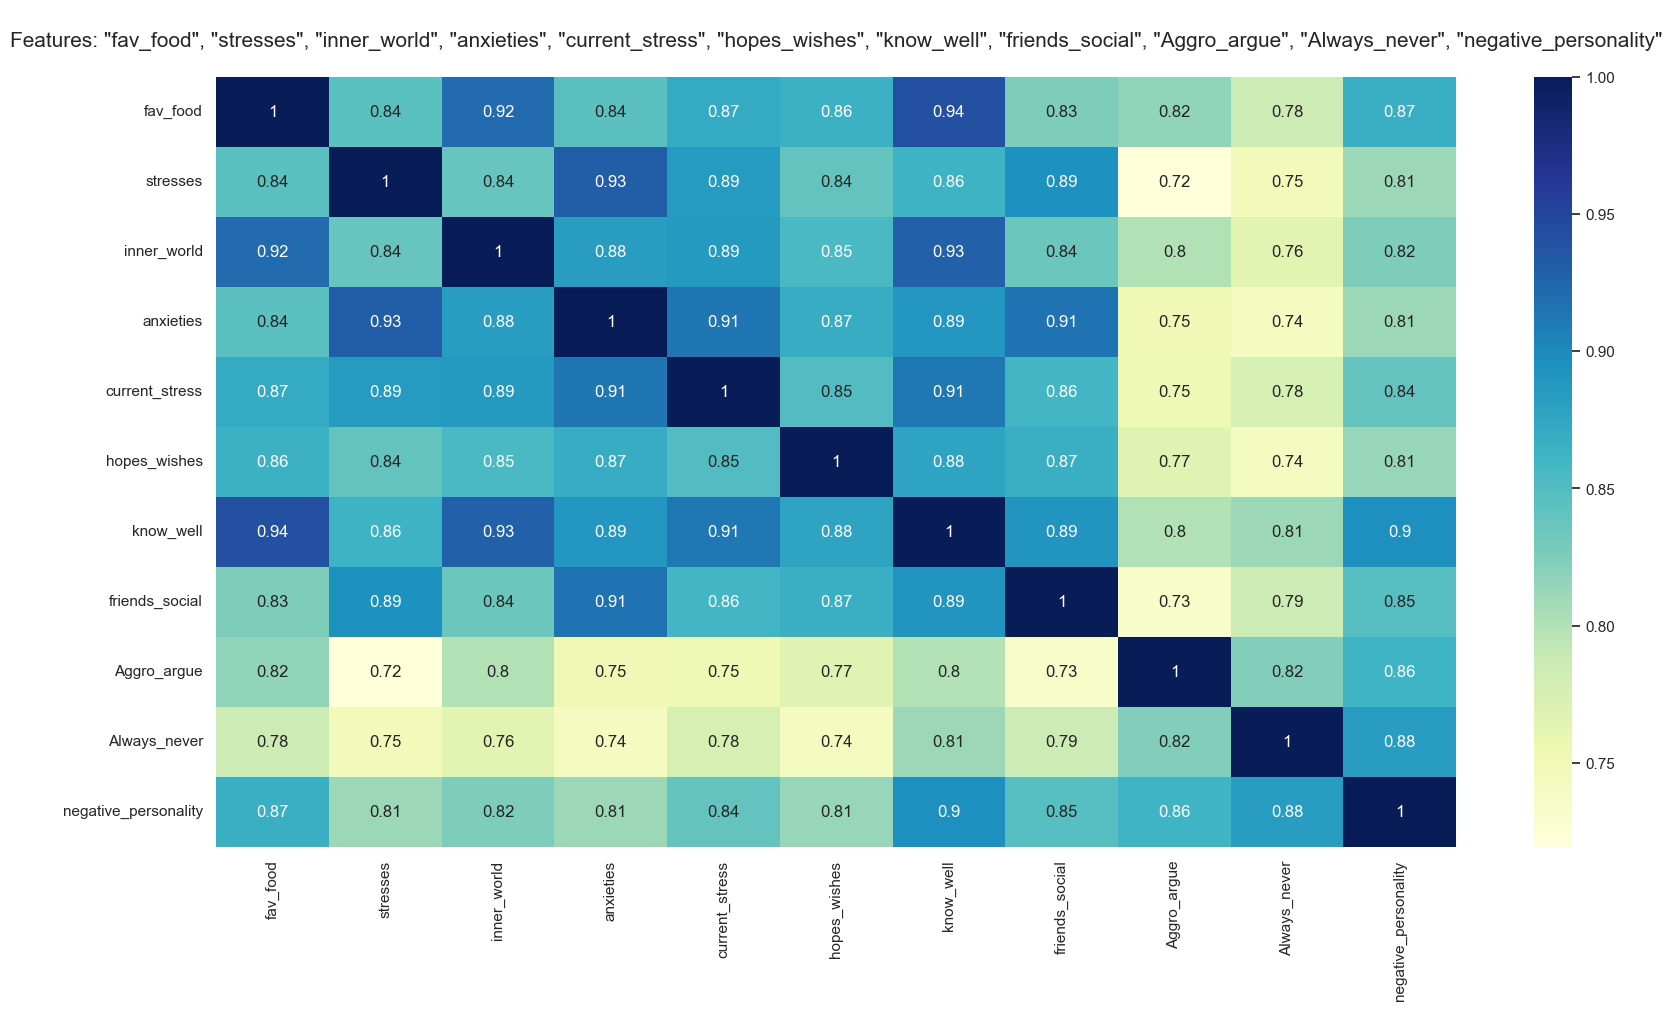

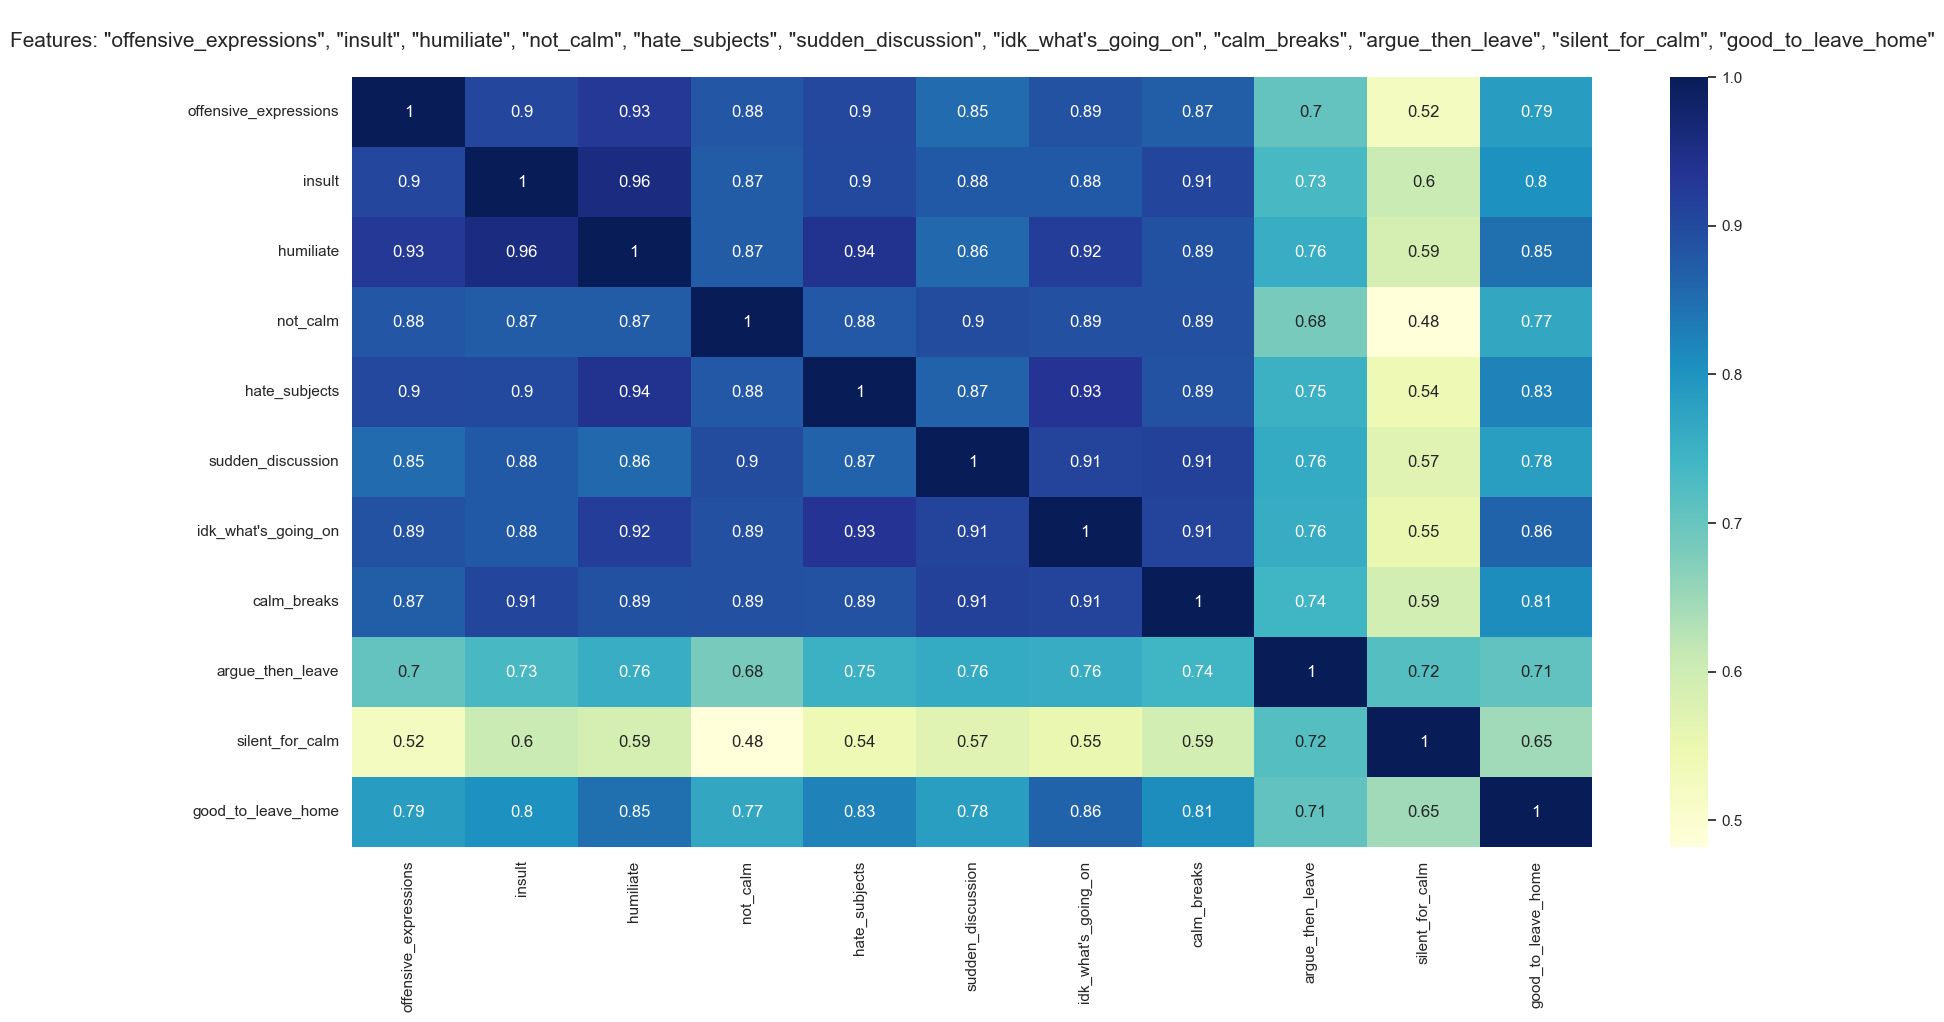

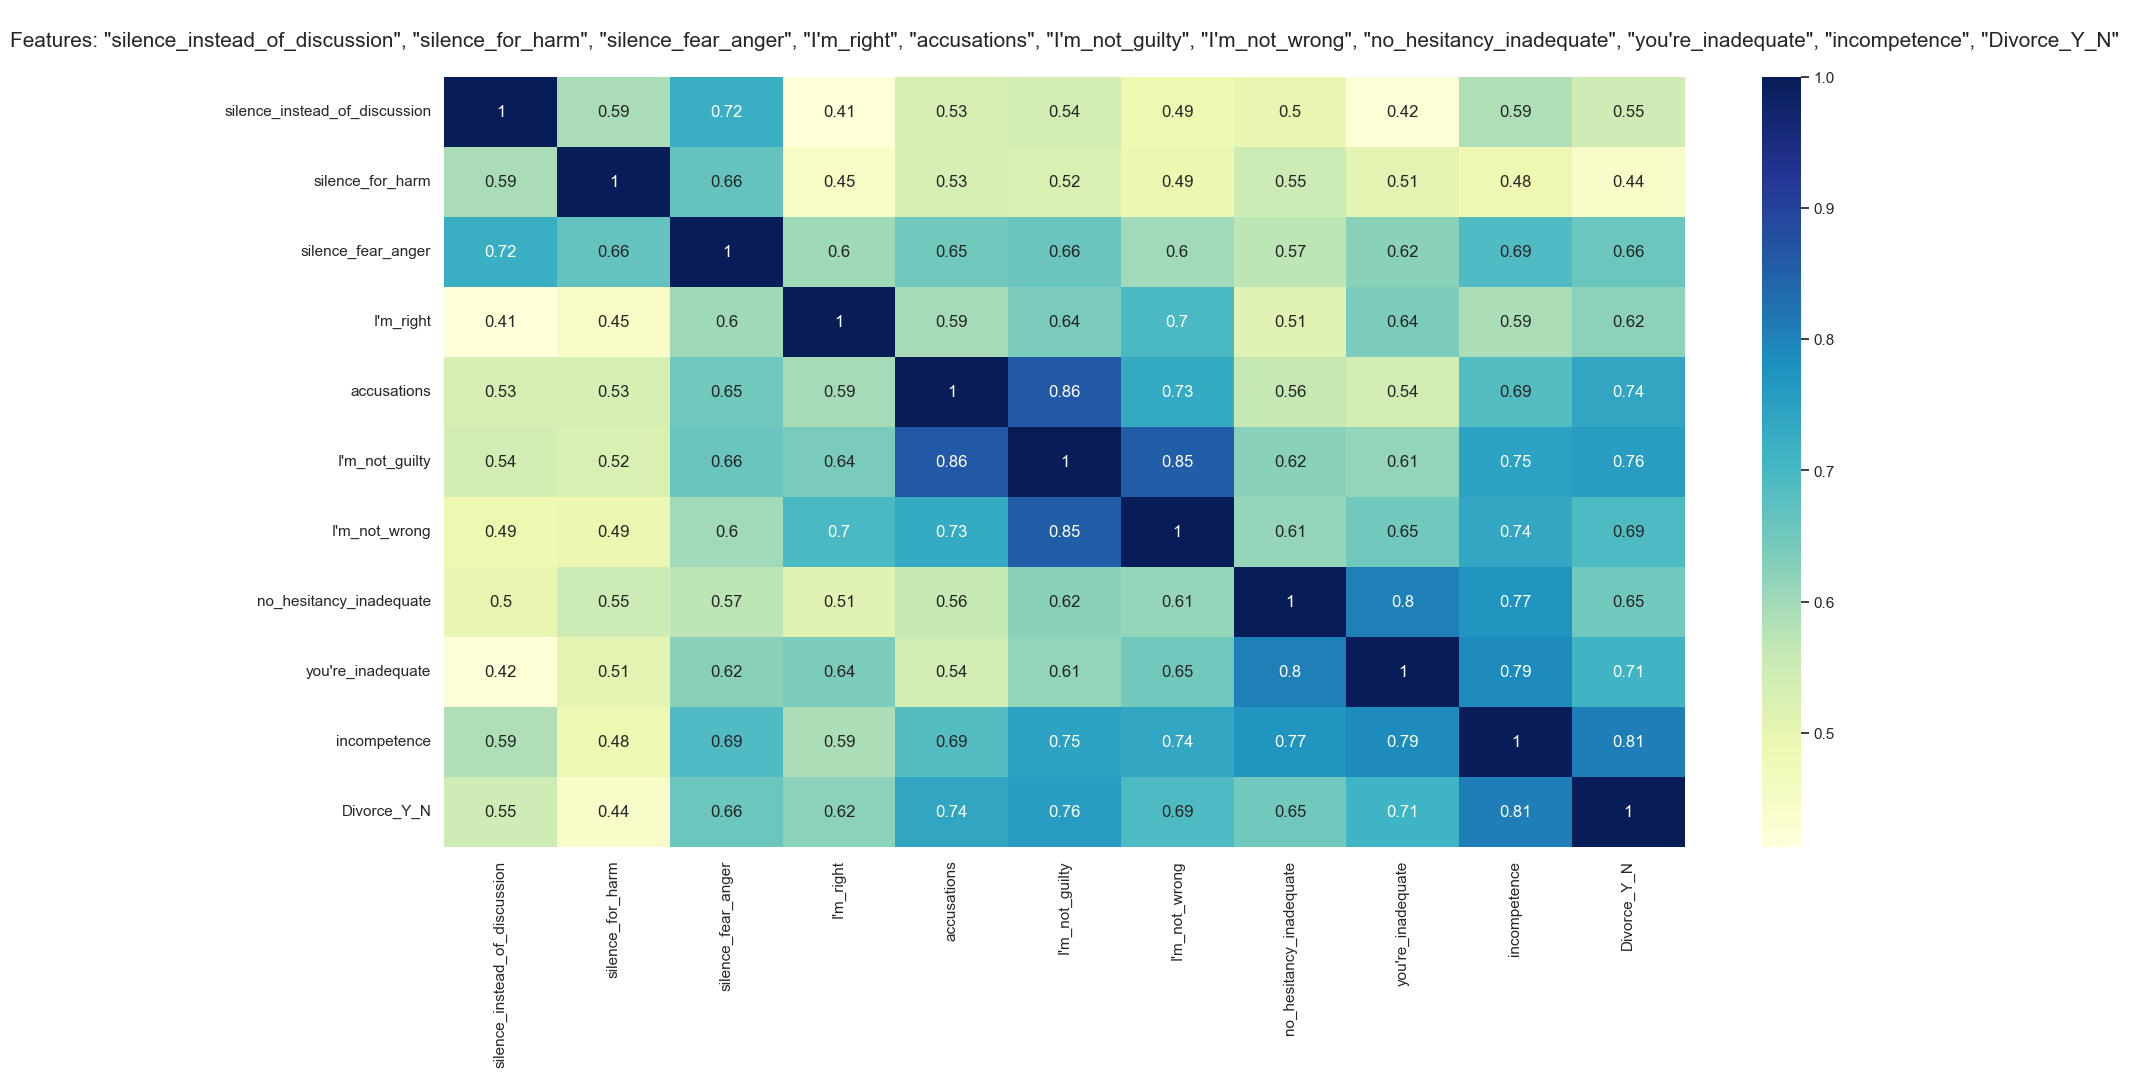

In [11]:
for sequence in range(5):
    plt.figure(sequence)
    range_from = sequence * FEATURES_TO_DISPLAY_HEAT_MAP
    range_to = range_from + FEATURES_TO_DISPLAY_HEAT_MAP
    corr = df[df.columns[range_from:range_to]].corr()
    p = sns.heatmap(corr, 
                    xticklabels=corr.columns,
                    yticklabels=corr.columns,
                    cmap="YlGnBu", annot = True)
    p.axes.set_title("\n"+"Features: " + ', '.join(['"' + str(elem) + '"' 
                                                    for elem in 
                                                    df.columns[range_from:range_to]]) + "\n",fontsize=15);

In [12]:
FEATURES_TO_DISPLAY_LINE_PLOT = 26

In [13]:
col_names = list(df.columns)
col_names.remove('Divorce_Y_N')

In [14]:
sns.set_theme(rc={'figure.figsize':(20,50)})

In [15]:
START_FROM = 1
ROWS = 13
COLUMNS = 2

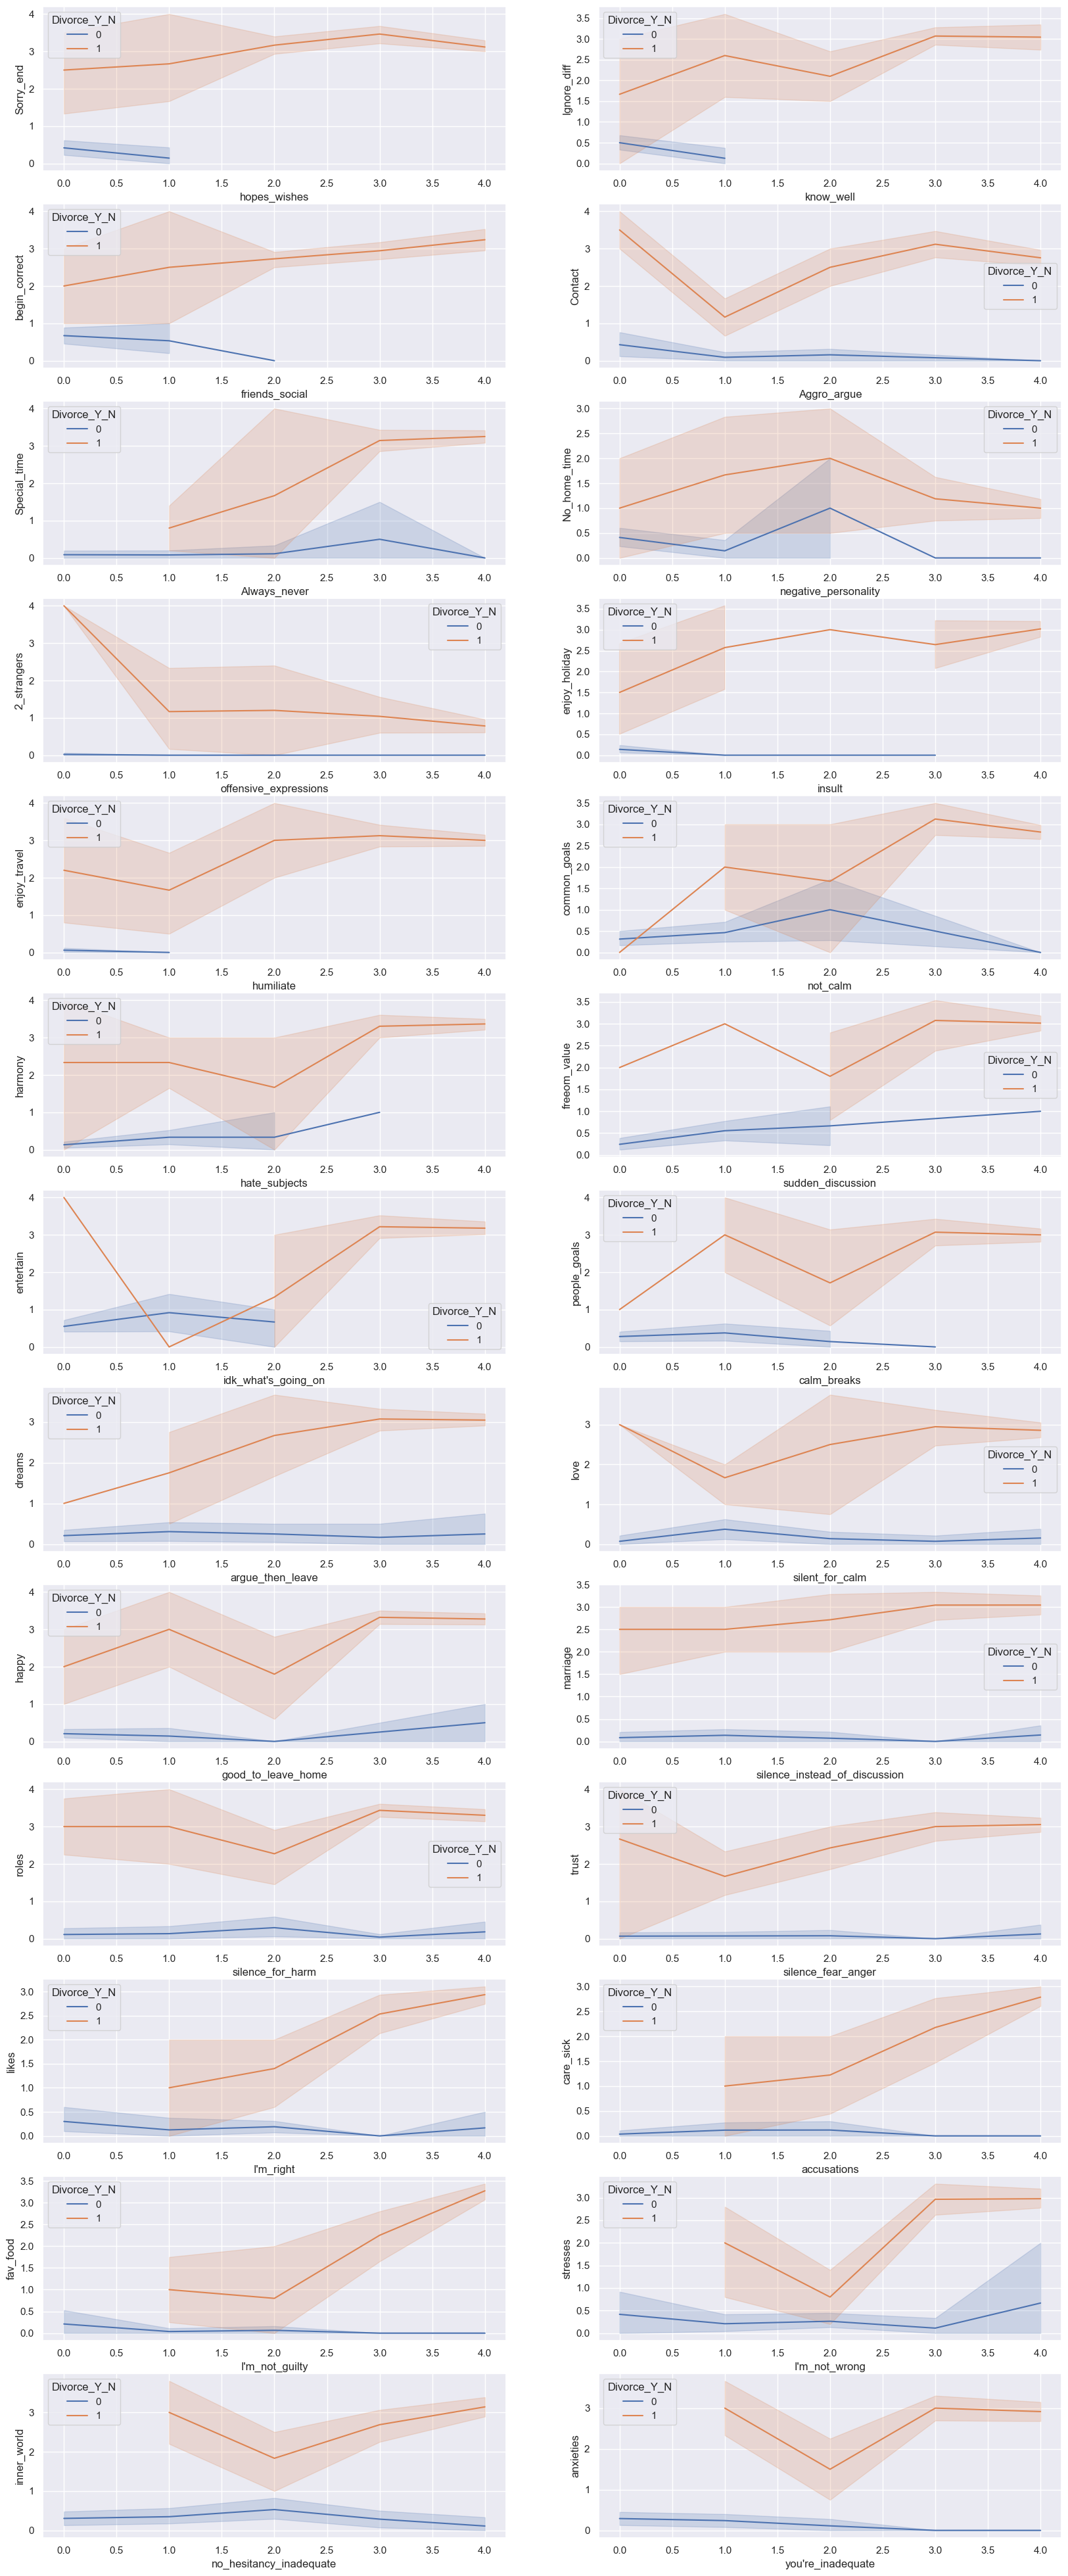

In [16]:
for sequence, feature in enumerate(col_names[:FEATURES_TO_DISPLAY_LINE_PLOT], START_FROM):
    x = col_names[sequence + FEATURES_TO_DISPLAY_LINE_PLOT]
    plt.subplot(ROWS, COLUMNS, sequence)
    sns.lineplot(hue='Divorce_Y_N', x=x, y=feature, data=df, color='blue')

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
import xgboost as xgbcx

In [19]:
X = df[col_names]
y = df['Divorce_Y_N']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)

In [21]:
xgb = XGBClassifier(learning_rate=0.02, subsample=0.8, min_child_weight=0.5, max_depth=4, gamma=1,
                    colsample_bytree=0.8, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1, random_state=3)

In [23]:
xgb.fit(X_train, y_train)

[12:54:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.02, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=0.5, missing=nan,
              monotone_constraints='()', n_estimators=600, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', ...)

In [24]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb, X_test, y_test, cv=kfold )

[12:55:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:55:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1667849653518/work/src/learner.cc:767

In [30]:
print(f"Mean cross-validation score: {scores.mean():.2f}")
print(f"K-fold CV average score: {kf_cv_scores.mean():.2f}")

Mean cross-validation score: 0.97
K-fold CV average score: 0.97


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [32]:
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

In [33]:
rfe.fit(X_train, y_train)

Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 fe

RFE(estimator=LogisticRegression(), n_features_to_select=6, verbose=1)

In [36]:
acc = roc_auc_score(y_true=y_test, y_score=rfe.predict(X_test))
print(f"{acc:.1%} roc_auc_score on test set.") 

100.0% roc_auc_score on test set.


In [ ]:
acc = roc_auc_score(y_true=y_train, y_rfe.predict(train_X))
print(f"{acc:.1%} roc_auc_score on train set.") 

# Calculates the overall set accuracy
acc = roc_auc_score(Y, rfe.predict(X))
print(f"{acc:.1%} roc_auc_score on whole set.") 